# BUILD A MODEL THAT CLASSIFIES THE SIDE EFFECTS OF A DRUG BATCH

# Import the libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data_df = pd.read_csv("C:/Users/user/Downloads/drug_effects.csv")

In [3]:
#Check the head of the data
data_df .head(10)

,No,DrugName,rating,effectiveness,condition,sideEffects
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
5,5,propecia,1,Ineffective,hair loss,Severe Side Effects
6,6,vyvanse,9,Highly Effective,add,Mild Side Effects
7,7,elavil,10,Considerably Effective,depression,No Side Effects
8,8,xanax,10,Highly Effective,panic disorder,No Side Effects
9,9,claritin,1,Ineffective,allergies,Extremely Severe Side Effects


# Basic Details Of the Dataset

In [4]:
#Check the number of rows and columns
data_df.shape

(3107, 6)

In [5]:
#Check the columns present in our dataset
data_df.columns

Index(['No', 'DrugName', 'rating', 'effectiveness', 'condition',
       'sideEffects'],
      dtype='object')

In [6]:
#Check information of the  data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No             3107 non-null   int64 
 1   DrugName       3107 non-null   object
 2   rating         3107 non-null   int64 
 3   effectiveness  3107 non-null   object
 4   condition      3106 non-null   object
 5   sideEffects    3107 non-null   object
dtypes: int64(2), object(4)
memory usage: 145.8+ KB


In [7]:
#Check is there any null values present
data_df.isnull().sum()

No               0
DrugName         0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [8]:
#Here null values in just 1 column i.e condition . We will leave the null values in that column for now as the null values are very small

In [9]:
##Check the percentage of null values in each column

In [10]:
data_df.isnull().sum()/data_df.shape[0]

No               0.000000
DrugName         0.000000
rating           0.000000
effectiveness    0.000000
condition        0.000322
sideEffects      0.000000
dtype: float64

In [11]:
#check number of unique values in drugName
print(data_df['DrugName'].nunique())

502


In [12]:
#check number of unique values in condition
print(data_df['condition'].nunique())

1426


In [13]:
#Here We can see that there are 502 DrugName and 1426 conditions.So there are drugs which has multiple conditions

In [14]:
data_df.isna().sum()

No               0
DrugName         0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [15]:
print(f"Total rows with missing value: {len(data_df[data_df.isna().any(axis=1)])} rows")

Total rows with missing value: 1 rows


In [16]:
data_df[data_df.isna().any(axis=1)].head()

,No,DrugName,rating,effectiveness,condition,sideEffects
2488,2488,keflex,2,Ineffective,NaN,No Side Effects


In [17]:
#Drop the null value raw

In [18]:
data_df = data_df.dropna(axis=0)

# Data Visualisation

# Check the top-30 Drugs by count

Text(0, 0.5, 'count')

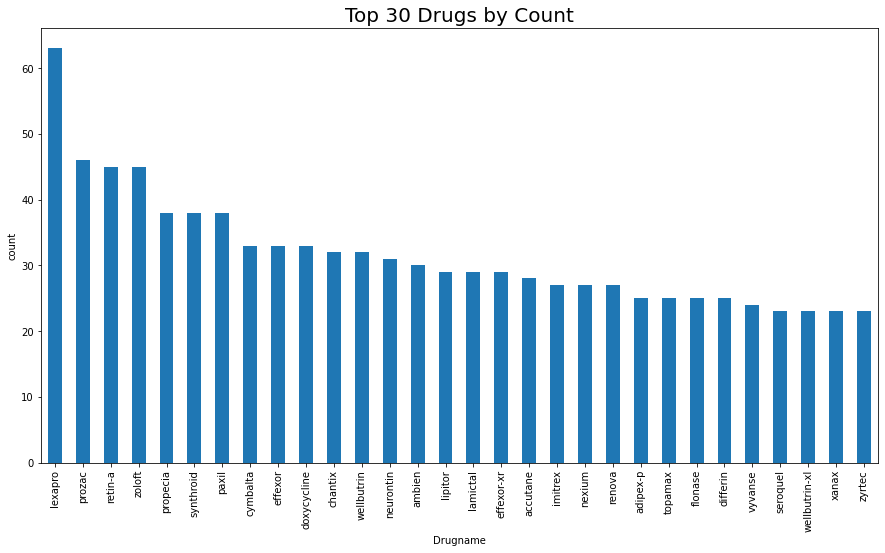

In [19]:
top30_drugs = data_df.DrugName.value_counts()[:30]
plt.figure(figsize = (15,8))
top30_drugs.plot(kind = 'bar');
plt.title('Top 30 Drugs by Count',fontsize = 20);
plt.xlabel("Drugname")
plt.ylabel("count")

# Top-30 problems using Drugs by Condition

Text(0.5, 0, 'Condition')

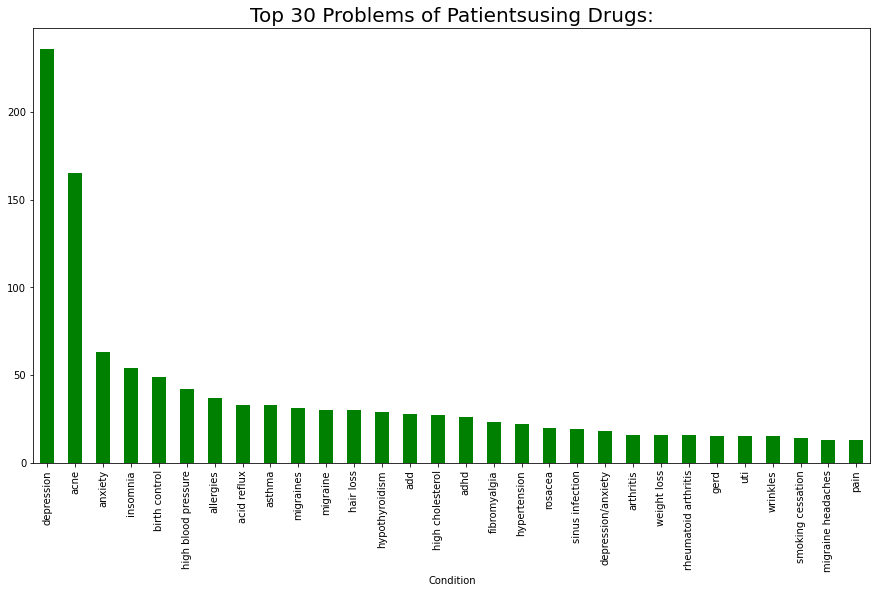

In [20]:
top30_problems = data_df.condition.value_counts()[:30]
top30_problems.plot(kind="bar", figsize = (15,8), fontsize = 10,color="green")
plt.title('Top 30 Problems of Patientsusing Drugs:',fontsize = 20)
plt.xlabel("Condition")

In [21]:
#From this above graph:
#depression is twice as big as anyone of the condition
#Most of the conditions for top 30 conditions are below 100.
#Here, we can see the problems faced by people by count.acne,anxiety,insomnia,birth Control followed by high blood pressure,
#allergies acid reflux,asthma and migraines are the top problems faced by people

# Count the number of ratings.

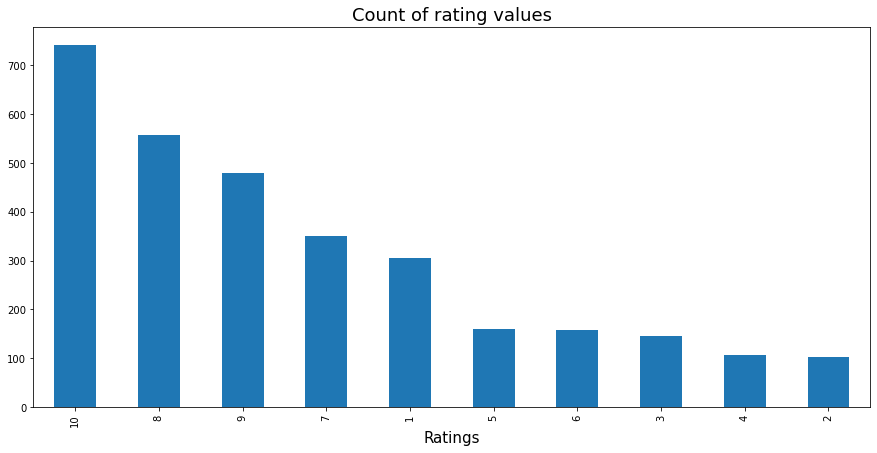

In [22]:
plt.figure(figsize = (15,7))
data_df.rating.value_counts().plot(kind = 'bar');
plt.xlabel('Ratings',fontsize = 15);
plt.title('Count of rating values',fontsize = 18);

In [23]:
#Most people choose the values; 10, 8, 9,7,1 and the number of 10 is more than  as many as the others.
# With this, we can see that the percentage of positives is higher than negative, and people's reactions are extreme.

#Here we'll consider ratings more than 5 as positive comments and less than or equal to 5 as negative comments

# Check the Percentages  of  SideEffects Of DRUG:

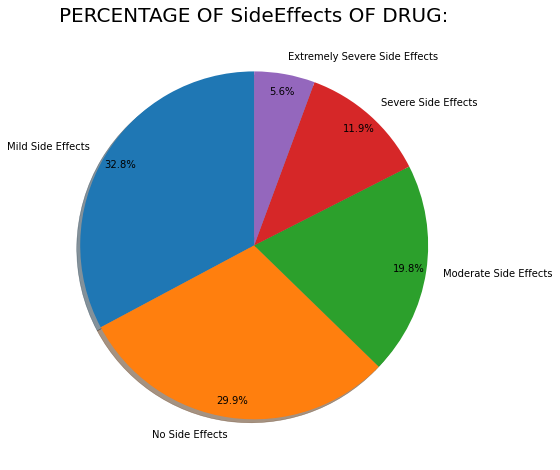

In [24]:
plt.figure(figsize=(15,8))
plt.title('PERCENTAGE OF SideEffects OF DRUG:',fontsize=20)
tr = pd.DataFrame(data_df['sideEffects'].value_counts())
tr_names = tr.index
count = tr['sideEffects']
plt.style.use('ggplot')
plt.rc('font', size=10)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)
plt.show()

# Plot top-20 drugs with rating 10

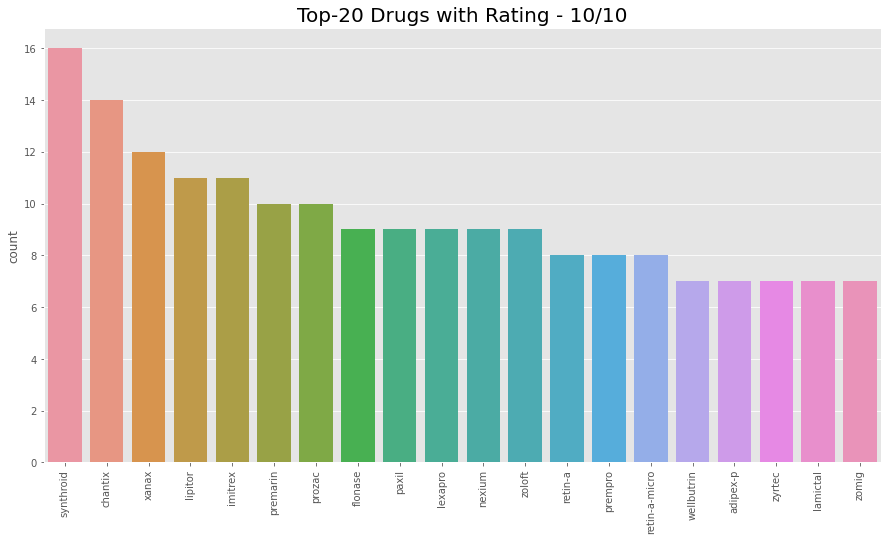

In [25]:
#Check top 20 drugs with rating=10/10
plt.figure(figsize=(15,8))
top_20_rating = data_df[data_df['rating'] == 10]['DrugName'].value_counts().head(20)
sns.barplot(x = top_20_rating.index, y = top_20_rating.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 10/10', fontsize=20)
plt.ylabel('count')
plt.show()

# Feature Engineering

In [26]:

##For the sentiment column, we use +1 for the positive class label and -1 for the negative class label.
##A good way is to create an anonymous function that converts a rating into a class label and then apply that function
#to every element in the rating column.

In [27]:
data_df['sentiment'] =data_df['rating'].apply(lambda rating : +1 if rating >= 5 else -1)
data_df.head(10)

,No,DrugName,rating,effectiveness,condition,sideEffects,sentiment
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects,-1
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects,-1
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects,1
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects,-1
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects,-1
5,5,propecia,1,Ineffective,hair loss,Severe Side Effects,-1
6,6,vyvanse,9,Highly Effective,add,Mild Side Effects,1
7,7,elavil,10,Considerably Effective,depression,No Side Effects,1
8,8,xanax,10,Highly Effective,panic disorder,No Side Effects,1
9,9,claritin,1,Ineffective,allergies,Extremely Severe Side Effects,-1


In [28]:
2.
# 2 Mean the patient review is POSITIVE
# 1 Mean the patient review is NEUTRAL
# 0 Mean the patient review is NEGATIVE

2.0

In [29]:
#data_df.loc[(data_df['rating'] >6), 'Review_sentiment'] =2
#data_df.loc[((data_df['rating'] >= 5) & (data_df['rating'] <= 6)), 'Review_sentiment']=1
#data_df.loc[(data_df['rating'] < 5), 'Review_sentiment'] =0 

In [30]:
#data_df['Review_sentiment'].value_counts().plot(kind="bar", figsize=(15,7), fontsize=15, color="blue")
#plt.xlabel("Sentiment Value", fontsize=20)
#plt.ylabel("Number of Review", fontsize=20)
#plt.title("Total Number of Reviews for each Sentiment value", fontsize=20)

In [31]:
## This bar graph show that the number of positive review is much higher then the negative reviews and 
## a lot less for the neutral reviews which is corresponding to the extream rating value that a patient rate.

# Check number of Drugs per condition


In [32]:
#lets check the number of drugs/condition
data_df.groupby('condition')['DrugName'].nunique().sort_values(ascending=False).head(20)

condition
acne                   34
depression             28
anxiety                22
high blood pressure    21
insomnia               17
hypertension           16
migraines              14
allergies              13
add                    12
asthma                 12
sinus infection        11
pain                   11
birth control          10
depression/anxiety      9
adhd                    9
bipolar disorder        9
migraine                9
arthritis               9
fibromyalgia            9
menopause               8
Name: DrugName, dtype: int64

In [33]:
#let's check if a single drug is used for multiple conditions
drug_multiple_cond = data_df.groupby('DrugName')['condition'].nunique().sort_values(ascending=False)
print(drug_multiple_cond.head(10))

DrugName
neurontin      30
retin-a        28
lexapro        25
tramadol       22
synthroid      21
cymbalta       21
doxycycline    19
zoloft         19
seroquel       18
flonase        18
Name: condition, dtype: int64


In [34]:
##There are many drugs which can be used for multiple conditions

# Encoding & Splitting Dataset

In [35]:
#Encoding the text column values in train and test data set to numeric value 
#from sklearn.preprocessing import LabelEncoder
#lbl=LabelEncoder()
#enc = data_df.apply(lbl.fit_transform)
#test_encod=data_df.apply(lbl.fit_transform)
#enc.head()

In [36]:
#Put target value y as seperate
y=data_df.pop('sideEffects')
#data_df.head()

In [37]:
#Encoding the text column values set to numeric value
#from sklearn.preprocessing import LabelEncoder
#label=LabelEncoder()
for col in ["DrugName","effectiveness","condition"]:
    data_df[col]=pd.factorize(data_df[col])[0]
    #data_df[col]=label.fit_transform(data_df[col])


In [38]:
y=pd.factorize(y)[0]
data_df.head()

,No,DrugName,rating,effectiveness,condition,sentiment
0,0,0,4,0,0,-1
1,1,1,1,0,1,-1
2,2,2,10,0,2,1
3,3,3,3,1,3,-1
4,4,4,2,1,4,-1


In [39]:
#Label Encoding y values (Side Effects)

#from sklearn.preprocessing import LabelEncoder
#label_enc = LabelEncoder()
#y= label_enc.fit_transform(data_df[['sideEffects']])



In [40]:
#Encoding the x features
#from sklearn.preprocessing import OneHotEncoder
#onehot_enc = OneHotEncoder()
#x= onehot_enc.fit_transform(data_df[['DrugName']])


In [41]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report

In [42]:
 #Test Splits
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_df, y, test_size=0.20, random_state=42)


In [43]:
x_train.shape


(2484, 6)

In [44]:
x_test.shape

(622, 6)

# MODEL SELECTION

# 1.  LogisticRegression



In [45]:
from sklearn.linear_model import LogisticRegression
logs_reg=LogisticRegression()
logs_reg.fit(x_train,y_train)
#Accuracy of Loistic Regression
y_pred=logs_reg.predict(x_test)
print('Accuracy of LogisticRegression is:',logs_reg.score(x_test,y_test)*100)



Accuracy of LogisticRegression is: 34.726688102893895


# 2.Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Accuracy of Randomforest classifier is:',classifier.score(x_test,y_test)*100)


Accuracy of Randomforest classifier is: 43.569131832797424


# 3. Bernoulli Naive Bayes

In [48]:
#fit the model and predicct the output
from sklearn.naive_bayes import BernoulliNB
clsfc = BernoulliNB()
clsfc.fit(x_train,y_train)
y_pred = clsfc.predict(x_test)
print("Bernoulli NB Accuracy: ", accuracy_score(y_test, y_pred)*100)

Bernoulli NB Accuracy:  40.67524115755627


# 4. Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred=dt_model.predict(x_test)
print('Accuracy of DT modelis:',dt_model.score(x_test,y_test)*100)


Accuracy of DT modelis: 38.263665594855304


# 5.SVM

In [51]:
from sklearn.svm import SVC
svm_clsfc = SVC().fit(x_train, y_train)
svm_pred = svm_clsfc.predict(x_test)
print("SVM accuracy is ", accuracy_score(y_test, y_pred)*100)
#print(classification_report(y_test, svm_pred)*100)

SVM accuracy is  38.263665594855304


# 6.KNN Model

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [53]:
print("Accuracy is: ",model.score(x_train,y_train)*100)

Accuracy is:  50.1610305958132


# 7.GRADIENT BOOSTING

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [55]:
grad2=GradientBoostingClassifier()
grad2.fit(x_train,y_train)
y_grad2=grad2.predict(x_test)
acc=accuracy_score(y_test,y_grad2)*100
print("Accuracy is: ",acc)

Accuracy is:  45.659163987138264


# Scaling

In [56]:

data_df.describe()

,No,DrugName,rating,effectiveness,condition,sentiment
count,3106.00000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000
mean,1552.69897,142.913715,7.007727,1.649388,403.300064,0.575016
std,897.04544,117.856684,2.936681,1.576108,427.971586,0.818274
min,0.00000,0.000000,1.000000,0.000000,0.000000,-1.000000
25%,776.25000,49.000000,5.000000,0.000000,40.250000,1.000000
50%,1552.50000,110.000000,8.000000,2.000000,214.000000,1.000000
75%,2328.75000,215.000000,9.000000,3.000000,697.750000,1.000000
max,3106.00000,501.000000,10.000000,4.000000,1425.000000,1.000000


In [57]:
#Standard scaler method
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)



# 1.1 Logistics Regression

In [58]:
from sklearn.linear_model import LogisticRegression
logs_reg=LogisticRegression()
logs_reg.fit(x_train,y_train)
#Accuracy of Loistic Regression
y_pred=logs_reg.predict(x_test)
print('Accuracy of LogisticRegression is:',logs_reg.score(x_test,y_test)*100)



Accuracy of LogisticRegression is: 47.266881028938904


# 1.2 RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy of Randomforest classifier is:',classifier.score(x_test,y_test)*100)

Accuracy of Randomforest classifier is: 45.01607717041801


# 1.3 Bernoulli Naive Bayes

In [60]:
#fit the model and predicct the output
from sklearn.naive_bayes import BernoulliNB
clsfc = BernoulliNB()
clsfc.fit(x_train,y_train)
y_pred = clsfc.predict(x_test)
print("Bernoulli NB Accuracy: ", accuracy_score(y_test, y_pred)*100)

Bernoulli NB Accuracy:  40.9967845659164


# 1.4  Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy of DT modelis:',dt_model.score(x_test,y_test)*100)

Accuracy of DT modelis: 37.138263665594856


# 1.5 SVM

In [62]:
from sklearn.svm import SVC
svm_clsfc = SVC().fit(x_train, y_train)
svm_pred = svm_clsfc.predict(x_test)
print("SVM accuracy is ", accuracy_score(y_test, y_pred)*100)
#print(classification_report(y_test, svm_pred)*100)

SVM accuracy is  37.138263665594856


# 1.6 KNN Model

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy is: ",model.score(x_train,y_train)*100)


Accuracy is:  59.90338164251207


#  1.7 GRADIENT BOOSTING

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
grad2=GradientBoostingClassifier()
grad2.fit(x_train,y_train)
y_grad2=grad2.predict(x_test)
acc=accuracy_score(y_test,y_grad2)*100
print("Accuracy is: ",acc)

Accuracy is:  47.42765273311897


In [65]:
#Compairing all these classification models KNN has the highest accuracy value i.e,59.9033